In [75]:
import tensorflow as tf
import numpy as np
from keras import models, layers
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [76]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [77]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))  # Create an all-zero matrix of shape (len(sequences), dimension)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results
 
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [78]:
print(f"x_train shape: {x_train.shape} y_train shape: {y_train.shape} x_test shape: {x_test.shape} y_test shape: {y_test.shape}")

x_train shape: (25000, 10000) y_train shape: (25000,) x_test shape: (25000, 10000) y_test shape: (25000,)


In [79]:
network = models.Sequential()
network.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
network.add(layers.Dense(16, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))

In [80]:
network.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [81]:
x_validation, x_test, y_validation, y_test = train_test_split(x_test, y_test, test_size=15000, random_state=42)

In [82]:
print(f"x_validation shape: {x_validation.shape} y_validation shape: {y_validation.shape} x_test shape: {x_test.shape} y_test shape: {y_test.shape}")

x_validation shape: (10000, 10000) y_validation shape: (10000,) x_test shape: (15000, 10000) y_test shape: (15000,)


In [83]:
history = network.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_validation, y_validation))

Epoch 1/20
49/49 [==============================] - 1s 17ms/step - loss: 0.4763 - accuracy: 0.8080 - val_loss: 0.3669 - val_accuracy: 0.8598
Epoch 2/20
49/49 [==============================] - 1s 13ms/step - loss: 0.2792 - accuracy: 0.9030 - val_loss: 0.3066 - val_accuracy: 0.8785
Epoch 3/20
49/49 [==============================] - 1s 12ms/step - loss: 0.2180 - accuracy: 0.9223 - val_loss: 0.2882 - val_accuracy: 0.8871
Epoch 4/20
49/49 [==============================] - 1s 13ms/step - loss: 0.1876 - accuracy: 0.9329 - val_loss: 0.2942 - val_accuracy: 0.8835
Epoch 5/20
49/49 [==============================] - 1s 12ms/step - loss: 0.1631 - accuracy: 0.9418 - val_loss: 0.3077 - val_accuracy: 0.8823
Epoch 6/20
49/49 [==============================] - 1s 12ms/step - loss: 0.1438 - accuracy: 0.9495 - val_loss: 0.3315 - val_accuracy: 0.8753
Epoch 7/20
49/49 [==============================] - 1s 15ms/step - loss: 0.1336 - accuracy: 0.9532 - val_loss: 0.3438 - val_accuracy: 0.8740
Epoch 8/20
49

In [84]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

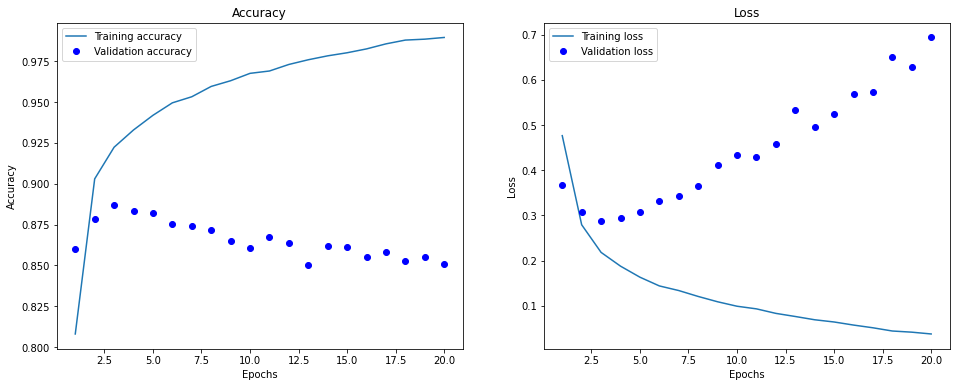

In [85]:
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, history_dict['accuracy'], label="Training accuracy")
plt.plot(epochs, history_dict['val_accuracy'], 'bo', label="Validation accuracy")
plt.title("Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(epochs, history_dict['loss'], label="Training loss")
plt.plot(epochs, history_dict['val_loss'], 'bo', label="Validation loss")
plt.title("Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.show()

In [86]:
test_loss, test_accuracy = network.evaluate(x_test, y_test)
print('test_loss:', test_loss)
print('test_acc:', test_accuracy)

 32/469 [=>............................] - ETA: 0s - loss: 0.6096 - accuracy: 0.8662

KeyboardInterrupt: 

In [62]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

In [63]:
callbacks = myCallback()
 
network.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
772/782 [============================>.] - ETA: 0s - loss: 0.0390 - accuracy: 0.9863
Reached 90% accuracy so cancelling training!
782/782 [==============================] - 3s 3ms/step - loss: 0.0392 - accuracy: 0.9863


In [67]:
def create_model():
    network = models.Sequential()
    network.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
    network.add(layers.Dense(16, activation='relu'))
    network.add(layers.Dense(1, activation='sigmoid'))
 
    network.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])
 
    return network
 
model = KerasClassifier(build_fn=create_model)
 
par1_batch = [32, 64]
par2_epoch = [3, 5]
 
param_grid = dict(batch_size=par1_batch,
                  epochs=par2_epoch
                  )
 
grid = GridSearchCV(estimator=model,                     
                    param_grid=param_grid,
                    cv = 3
                    )
 
grid_results = grid.fit(x_train, y_train)
 
print("Best: %f using %s" % (grid_results.best_score_, grid_results.best_params_))

C:\Users\tomek\AppData\Local\Temp/ipykernel_13744/3413615722.py:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model)


Epoch 1/3
521/521 [==============================] - 2s 3ms/step - loss: 0.3449 - accuracy: 0.8586
Epoch 2/3
521/521 [==============================] - 2s 4ms/step - loss: 0.2067 - accuracy: 0.9215
Epoch 3/3
261/261 [==============================] - 1s 2ms/step - loss: 0.3131 - accuracy: 0.8865
Epoch 1/3
521/521 [==============================] - 3s 4ms/step - loss: 0.3528 - accuracy: 0.8548
Epoch 2/3
521/521 [==============================] - 2s 4ms/step - loss: 0.2056 - accuracy: 0.9237
Epoch 3/3
261/261 [==============================] - 1s 2ms/step - loss: 0.3125 - accuracy: 0.8847
Epoch 1/3
521/521 [==============================] - 2s 4ms/step - loss: 0.3516 - accuracy: 0.8529
Epoch 2/3
521/521 [==============================] - 2s 4ms/step - loss: 0.2097 - accuracy: 0.9203
Epoch 3/3
261/261 [==============================] - 1s 2ms/step - loss: 0.3064 - accuracy: 0.8874
Epoch 1/5
521/521 [==============================] - 2s 4ms/step - loss: 0.3503 - accuracy: 0.8580
Epoch 2/5


In [68]:
import keras_tuner

In [73]:
def build_model(hp):
    network = models.Sequential()
    network.add(layers.Dense(units=hp.Int('units', min_value=16, max_value=256, step=16), activation='relu', input_shape=(10000,)))
    network.add(layers.Dense(units=hp.Int('units', min_value=16, max_value=256, step=16), activation='relu'))
    network.add(layers.Dense(1, activation='sigmoid'))
 
    network.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])
 
    return network

In [74]:
tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5)
 
tuner.search(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_validation, y_validation))
best_model = tuner.get_best_models()[0]


Reloading Tuner from .\untitled_project\tuner0.json
